# Project Attempt 1 Miguel Loya

## Importing Necesarry Libraries

In [29]:
# !pip install pandas_profiling
# !pip install ipywidgets
# !pip install catboost
# !pip install hyperopt
# !pip install multiprocessing

In [30]:
import warnings
warnings.filterwarnings("ignore")
# Libraries Data Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
# Metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import metrics
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
import multiprocessing
from sklearn import datasets
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

## Loaded Dataset

In [31]:
df_travel_train = pd.read_csv(r'C:\Users\subde\OneDrive - Universidad La Salle Chihuahua\Cursos\MIT\Data Science & Machine Learning\Curso\0. Special Projects\1. Hackaton Shinkasen Travel Experience\Data\Traveldata_train.csv')
df_travel_test = pd.read_csv(r'C:\Users\subde\OneDrive - Universidad La Salle Chihuahua\Cursos\MIT\Data Science & Machine Learning\Curso\0. Special Projects\1. Hackaton Shinkasen Travel Experience\Data\Traveldata_test.csv')
df_survey_train = pd.read_csv(r'C:\Users\subde\OneDrive - Universidad La Salle Chihuahua\Cursos\MIT\Data Science & Machine Learning\Curso\0. Special Projects\1. Hackaton Shinkasen Travel Experience\Data\Surveydata_train.csv')
df_survey_test = pd.read_csv(r'C:\Users\subde\OneDrive - Universidad La Salle Chihuahua\Cursos\MIT\Data Science & Machine Learning\Curso\0. Special Projects\1. Hackaton Shinkasen Travel Experience\Data\Surveydata_test.csv')

In [32]:
df_train = pd.merge(df_travel_train, df_survey_train, on = 'ID', how = 'inner')
df_test = pd.merge(df_travel_test, df_survey_test, on = 'ID', how = 'inner')

In [33]:
df_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [34]:
df_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

*Observation:*

* 94,379 observations and 25 columns in the train data.

* ID, Age, Travel_Distance, Departure_Delay_in_Mins, Arrival_Delay_in_Mins and Overall_Experience columns are numeric columns and the rest are object type columns.

* ID, Travel_Class, Travel_Distance, Overall_Experience and Seat_Class columns don't have missing values.


In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

*Observations:*

* 35,602 observations and 24 columns in the test data.
* ID, Age, Travel_Distance, Departure_Delay_in_Mins, Arrival_Delay_in_Mins and Overall_Experience columns are numeric columns while the rest are object type columns.
* ID, Travel_Class, Travel_Distance and the Seat_Class columns don't have missing values.

## Exploratory Data Anlysis

In [37]:
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,94379.0,NaN,NaN,NaN,98847190.0,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Gender,94302,2,Female,47815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,85428,2,Loyal Customer,69823,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,94346.0,NaN,NaN,NaN,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Type_Travel,85153,2,Business Travel,58617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Class,94379,2,Eco,49342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Distance,94379.0,NaN,NaN,NaN,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,NaN,NaN,NaN,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,NaN,NaN,NaN,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,NaN,NaN,NaN,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


*Observations:*

* The dataset contains the highest number of observations for the customer type "Loyal," with 85,428 instances.
* The average age of the customers is approximately 39 years old.
* "Business" is the most common type of travel, with 85,153 observations.
* "Eco" is the most frequently chosen travel class, with 49,342 instances.
* The average travel distance is approximately 1978.88 units.
* The dataset has a higher number of observations for the female gender.
* The average departure delay is around 14 minutes, and approximately 25% of the customers experienced delays in their departures.
* The average arrival delay is approximately 15 minutes, and around 25% of the customers had delays in their arrivals.
* More than 50% of the customers had an overall experience classified as "Satisfied."
* The majority of customers found the seat comfort to be acceptable.
* The most commonly chosen seat class is "Green Car," with 47,435 observations.
* The arrival time convenience was rated as good by most customers.
* The catering service was deemed acceptable by most customers.
* The platform locations were manageable for the majority of customers.
* Most customers rated the remaining survey aspects as "Good."

In [38]:
df_test.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,35602.0,NaN,NaN,NaN,99917801.5,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Gender,35572,2,Female,18069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Type,32219,2,Loyal Customer,26349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,35591.0,NaN,NaN,NaN,39.446995,15.137554,7.0,27.0,40.0,51.0,85.0
Type_Travel,32154,2,Business Travel,22313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Class,35602,2,Eco,18473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Travel_Distance,35602.0,NaN,NaN,NaN,1987.151761,1024.308863,50.0,1360.0,1929.0,2559.0,6868.0
Departure_Delay_in_Mins,35573.0,NaN,NaN,NaN,14.880696,37.895453,0.0,0.0,0.0,13.0,978.0
Arrival_Delay_in_Mins,35479.0,NaN,NaN,NaN,15.308802,38.531293,0.0,0.0,0.0,13.0,970.0
Seat_Comfort,35580,6,Acceptable,8003,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_train['Overall_Experience'].value_counts(normalize = True)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

*Observation*
* Inte variable tehe is a 54% that peaople had rated the experience in general as "satisfied"

In [40]:
# Creating numerical columns
num_cols = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins',
            'Overall_Experience']

# Creating categorical variables 
cat_cols = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort', 'Seat_Class',
            'Arrival_Time_Convenient','Catering', 'Platform_Location', 'Onboard_Wifi_Service',
            'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking','Onboard_Service',
            'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

<function matplotlib.pyplot.show(close=None, block=None)>

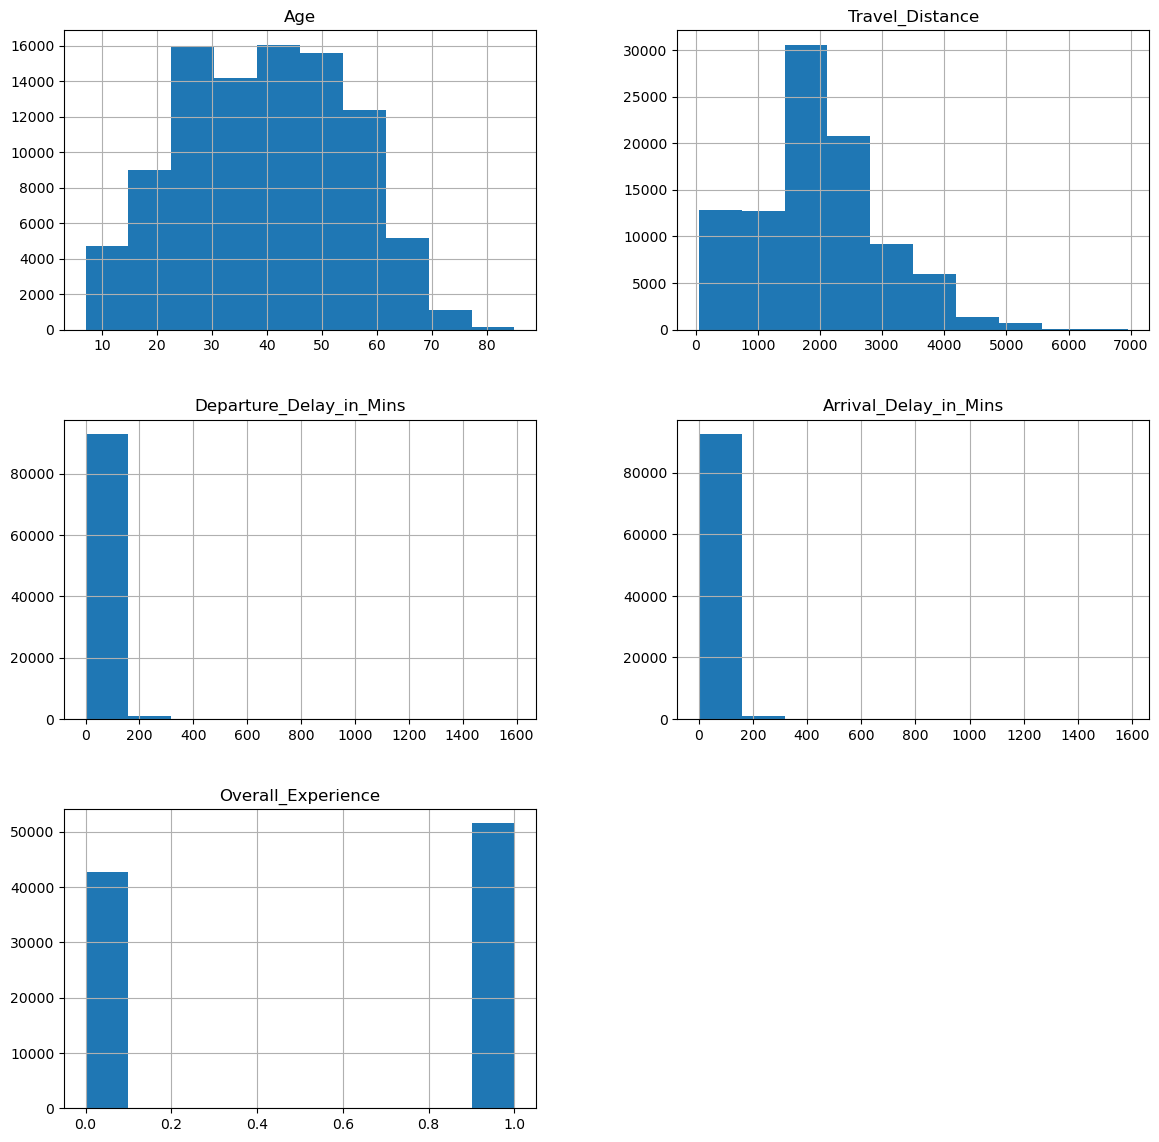

In [41]:
df_train[num_cols].hist(figsize = (14,14))
plt.show

*Observations*
* The distribution of passenger ages closely resembles a normal distribution, with the majority of passengers falling between the ages of 22 and 53.
* The distribution of the "Travel_Distance" variable is right-skewed, with a peak around 1800 units.
* The distributions of the "Departure_Delay_in_Mins" and "Arrival_Delay_in_Mins" variables indicate that, most of the time, there are no delays in departures or arrivals.
* There are a higher number of observations for passengers who reported a "Satisfied" experience.


In [42]:
for i in cat_cols:
    print(df_train[i].value_counts(normalize = True))
    print('*'*40)

Female    0.507041
Male      0.492959
Name: Gender, dtype: float64
****************************************
Loyal Customer       0.817332
Disloyal Customer    0.182668
Name: Customer_Type, dtype: float64
****************************************
Business Travel    0.688373
Personal Travel    0.311627
Name: Type_Travel, dtype: float64
****************************************
Eco         0.522807
Business    0.477193
Name: Travel_Class, dtype: float64
****************************************
Acceptable           0.224326
Needs Improvement    0.222079
Good                 0.218357
Poor                 0.160998
Excellent            0.137524
Extremely Poor       0.036716
Name: Seat_Comfort, dtype: float64
****************************************
Green Car    0.502601
Ordinary     0.497399
Name: Seat_Class, dtype: float64
****************************************
Good                 0.229072
Excellent            0.206954
Acceptable           0.177615
Needs Improvement    0.175426
Poor        

*Observations*
* The dataset consists of roughly an equal number of males and females.
* Approximately 81% of the customers are classified as "Loyals."
* "Business" is the most common type of travel, accounting for around 68% of the observations.
* The "Eco" and "Business" travel classes have nearly equal representation in the dataset.
* The "Green Car" and "Ordinary" seat classes also have a similar number of observations.
* In terms of the remaining survey features, the most common rating given by customers was "Good."

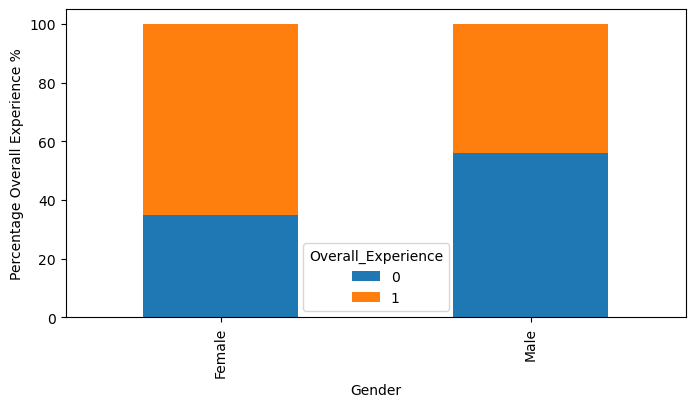

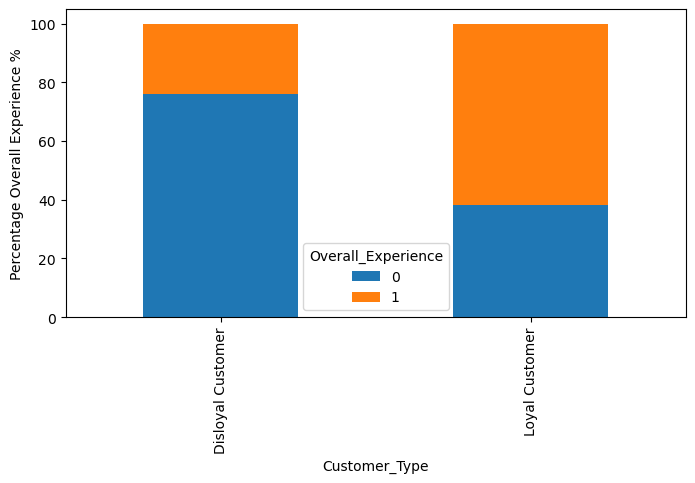

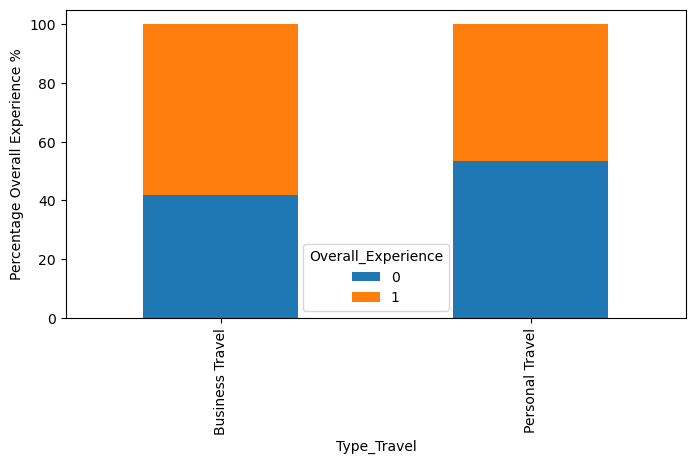

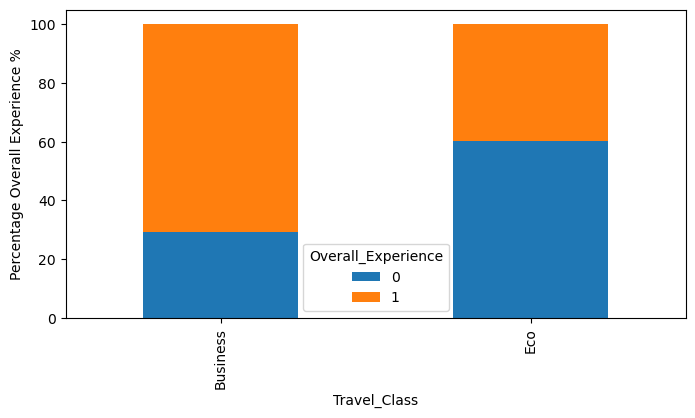

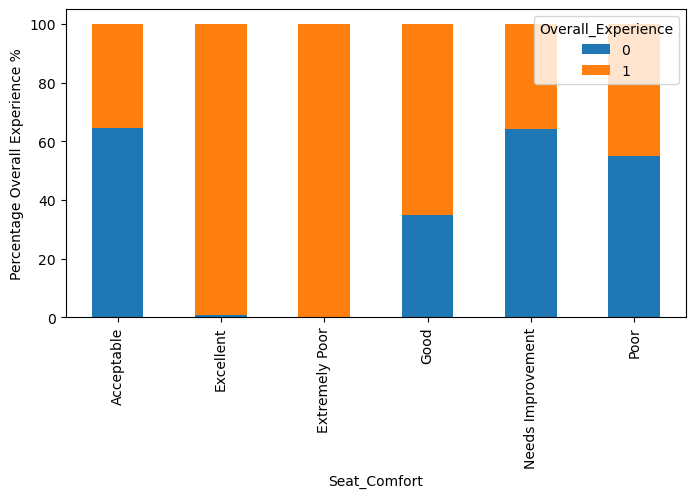

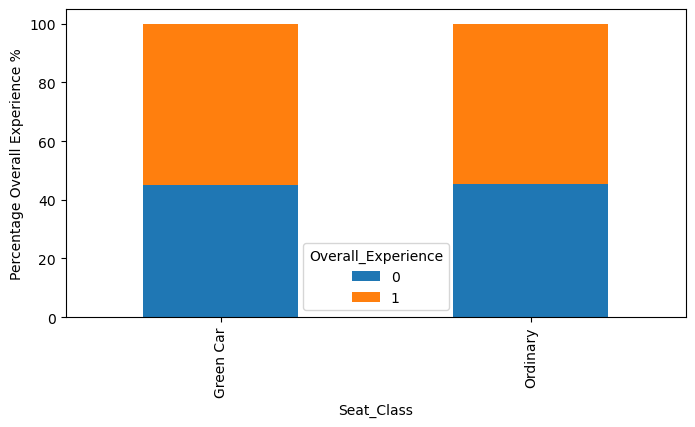

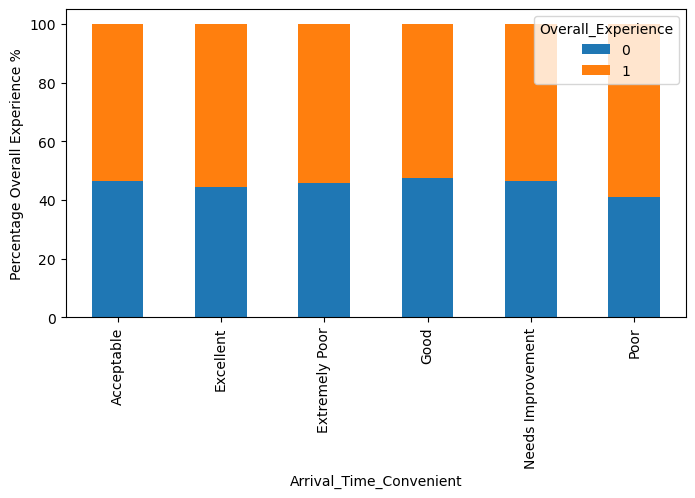

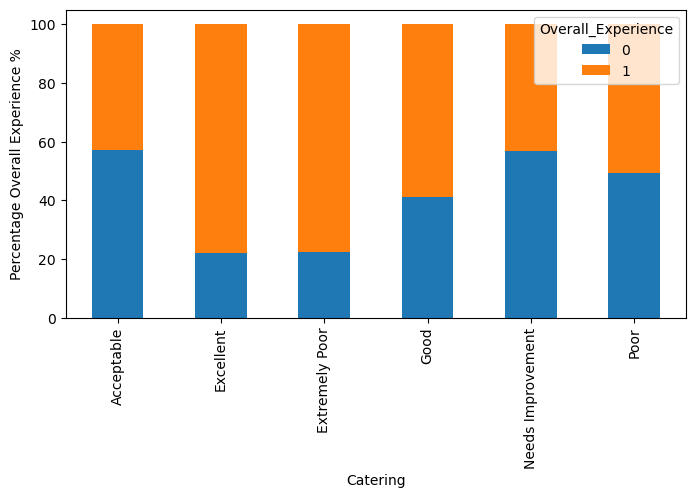

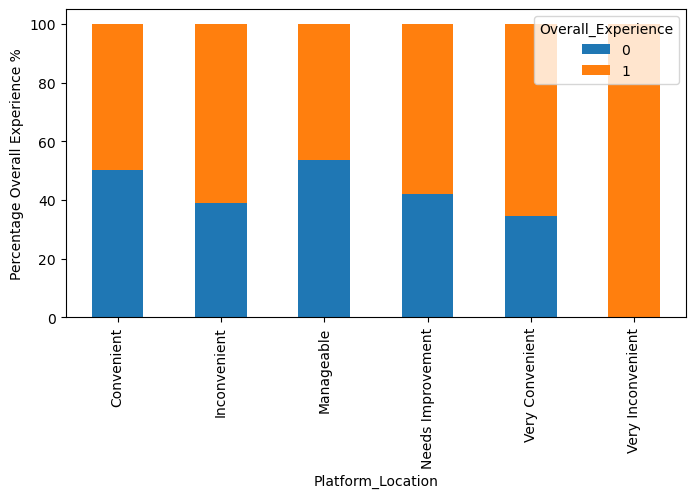

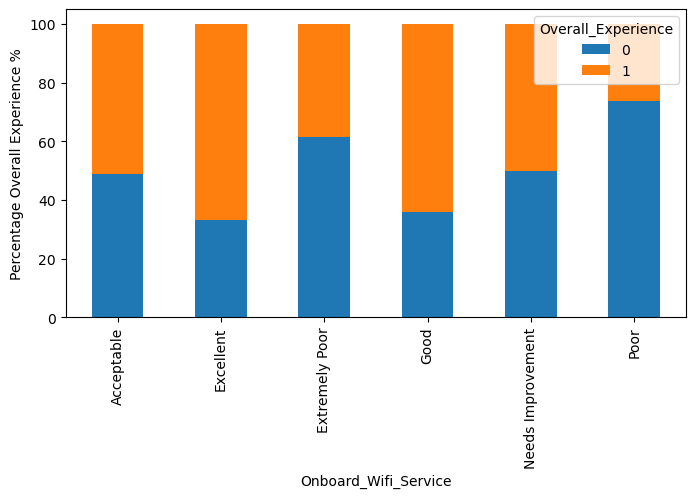

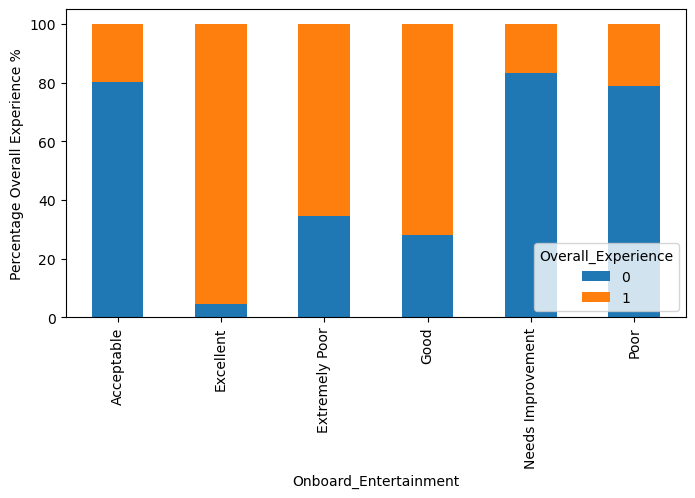

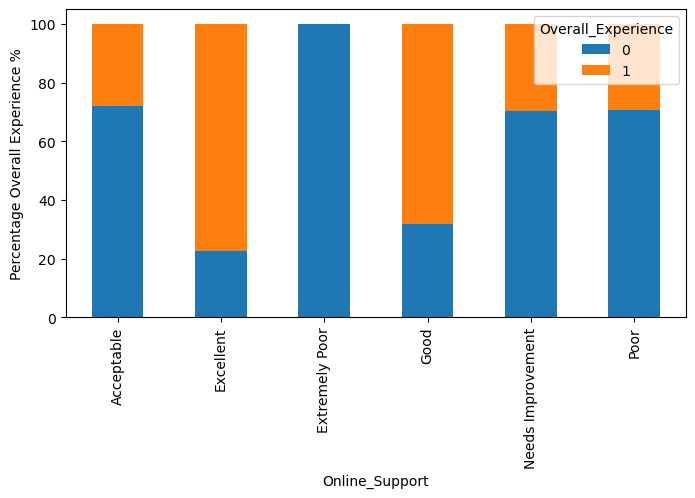

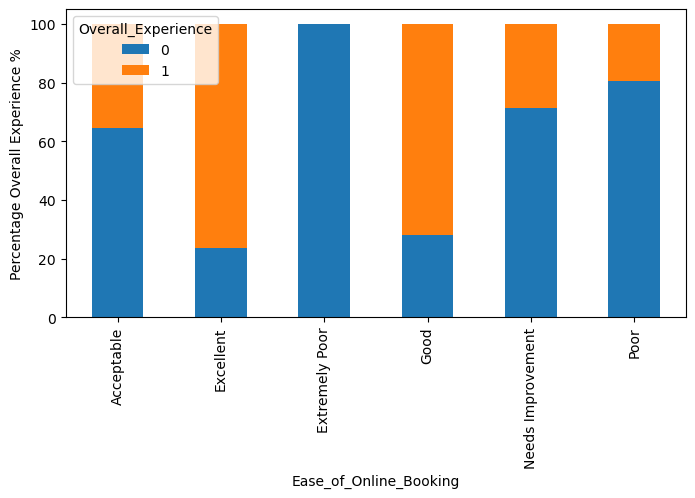

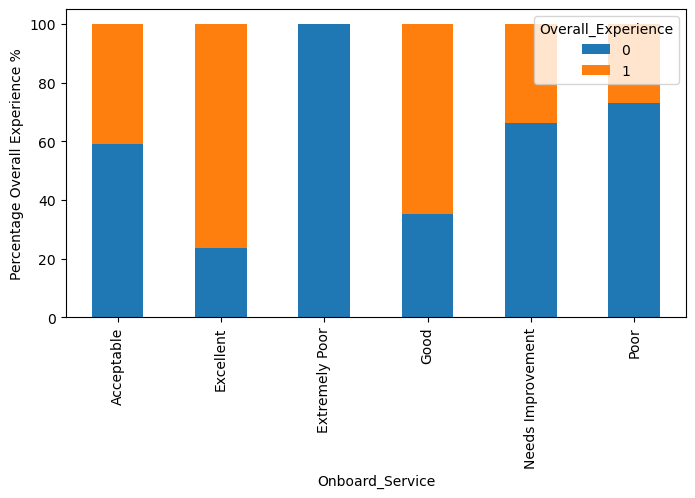

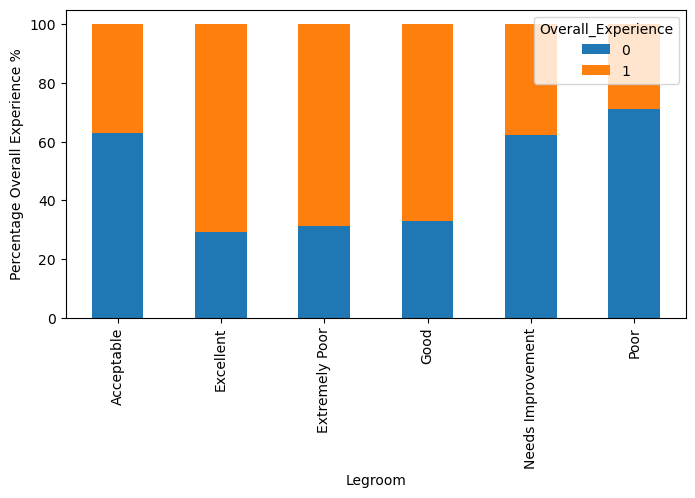

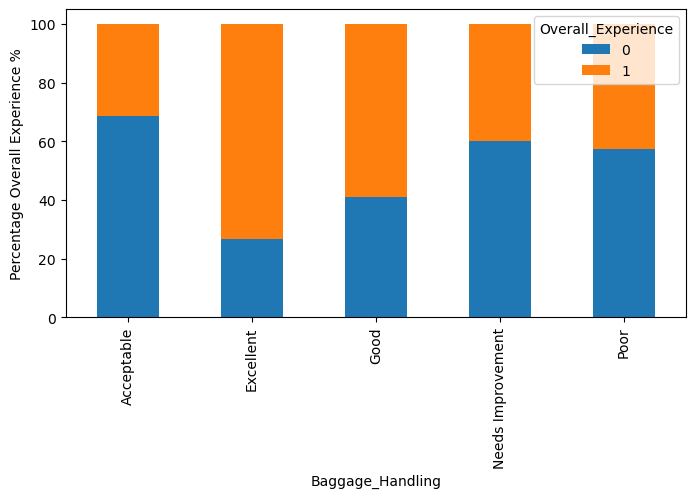

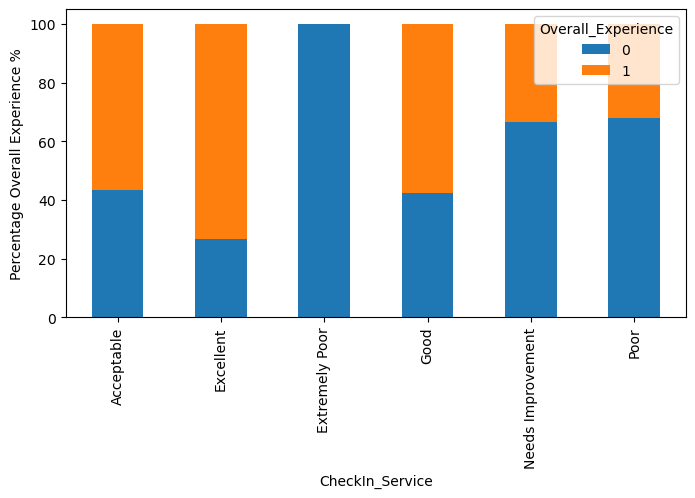

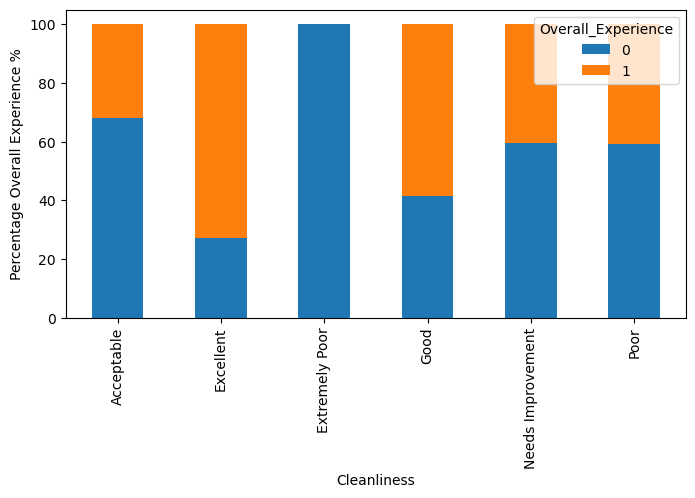

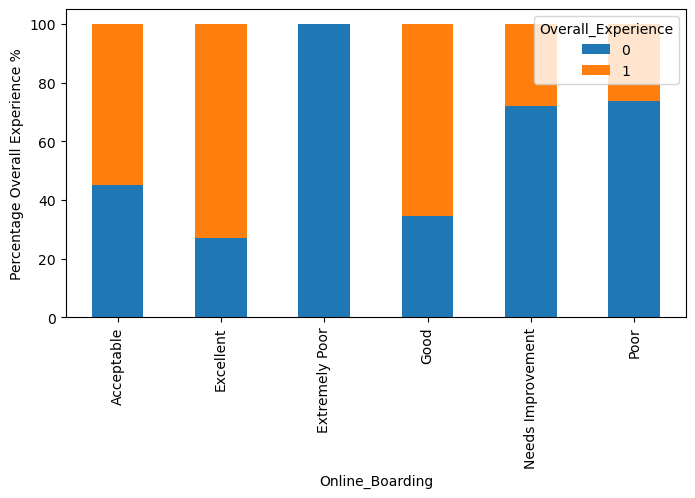

In [43]:
for i in cat_cols:
    if i != 'Overall_Experience':
        (pd.crosstab(df_train[i], df_train['Overall_Experience'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True)
        plt.ylabel('Percentage Overall Experience %')

*Observations*
* Females have a Satisfied Experience rate of over 60%, whereas males have a rate of approximately 40%.
* Loyal customers have an approximate Satisfied Experience rate of 60%.
* The Business travel class has a high Satisfied Experience rate of around 70%.
* When the seat comfort is rated as excellent or extremely poor, the Satisfied Experience rate is almost 100%.
* When the onboard entertainment is rated as "Excellent," the Satisfied Experience rate is almost 100%.
* There is a 0% Satisfied Experience rate when the Online Support, Ease of online booking, Onboard service, Check-in service, Cleanliness, and Online boarding are rated as "Extremely Poor."

## Null values

In [44]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [45]:
null_cols = ['Gender', 'Customer_Type', 'Type_Travel', 'Seat_Comfort', 'Arrival_Time_Convenient',
           'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 
           'Online_Support', 'Ease_of_Online_Booking','Onboard_Service', 'Legroom', 'Baggage_Handling', 
           'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

In [46]:
# creates a new categorical column for missing values
def treat_missing_categorical(df, cols):
   
    # create a new category for missing values in each column
    for col in null_cols:
        df[col] = df[col].fillna('Missing')
    
    return df

In [47]:
treat_missing_categorical(df_train, null_cols)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,Missing,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0,0,...,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0,1,...,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,Male,Missing,63.0,Business Travel,Business,2794,0.0,0.0,1,...,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0,0,...,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good


In [48]:
treat_missing_categorical(df_test, null_cols)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,Missing,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,Missing,Acceptable,Excellent,Excellent,Excellent,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0,Needs Improvement,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
35598,99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0,Needs Improvement,...,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
35599,99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0,Good,...,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0,Excellent,...,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good


In [49]:
null_numcat = ['Age', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

In [50]:
def replace_with_mode(df, cols):
    for col in cols:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

In [51]:
replace_with_mode(df_train, null_numcat)

In [52]:
replace_with_mode(df_test, null_numcat)

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94379 non-null  object 
 2   Customer_Type            94379 non-null  object 
 3   Age                      94379 non-null  float64
 4   Type_Travel              94379 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94379 non-null  float64
 8   Arrival_Delay_in_Mins    94379 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94379 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  94379 non-null  object 
 13  Catering                 94379 non-null  object 
 14  Platform_Location     

In [54]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35602 non-null  object 
 2   Customer_Type            35602 non-null  object 
 3   Age                      35602 non-null  float64
 4   Type_Travel              35602 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35602 non-null  float64
 8   Arrival_Delay_in_Mins    35602 non-null  float64
 9   Seat_Comfort             35602 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  35602 non-null  object 
 12  Catering                 35602 non-null  object 
 13  Platform_Location        35602 non-null  object 
 14  Onboard_Wifi_Service  

## Preparing Data for the Model

In [55]:
df_train.drop(['ID', 'Seat_Class'], axis = 1, inplace = True)

In [56]:
X_train = df_train.drop(columns = 'Overall_Experience')
y_train = df_train['Overall_Experience']

In [57]:
X_dum = pd.get_dummies(X_train, drop_first = True)
corr_matrix = X_dum.corr()

In [58]:
threshold = 0.95
for col in corr_matrix.columns:
    for row, val in corr_matrix[col].iteritems():
        correlation = corr_matrix[col][row]
        if not col==row and correlation > threshold:
            print(f"{col}   and   {row}   correlation  = {correlation}")
            print('*'*100)

Departure_Delay_in_Mins   and   Arrival_Delay_in_Mins   correlation  = 0.9589399248347382
****************************************************************************************************
Arrival_Delay_in_Mins   and   Departure_Delay_in_Mins   correlation  = 0.9589399248347382
****************************************************************************************************
Platform_Location_Missing   and   Onboard_Wifi_Service_Missing   correlation  = 1.0
****************************************************************************************************
Onboard_Wifi_Service_Missing   and   Platform_Location_Missing   correlation  = 1.0
****************************************************************************************************
Online_Support_Extremely Poor   and   CheckIn_Service_Extremely Poor   correlation  = 1.0
****************************************************************************************************
CheckIn_Service_Extremely Poor   and   Online_Support_Ext

In [59]:
Xtst_dum = pd.get_dummies(df_test, drop_first = True)
corr_matrix_test = Xtst_dum.corr()

In [60]:
threshold = 0.95
for col in corr_matrix_test.columns:
    for row, val in corr_matrix_test[col].iteritems():
        correlation = corr_matrix_test[col][row]
        if not col==row and correlation > threshold:
            print(f"{col}   and   {row}   correlation  = {correlation}")
            print('*'*100)

Departure_Delay_in_Mins   and   Arrival_Delay_in_Mins   correlation  = 0.9606542173462682
****************************************************************************************************
Arrival_Delay_in_Mins   and   Departure_Delay_in_Mins   correlation  = 0.9606542173462682
****************************************************************************************************
Platform_Location_Missing   and   Onboard_Wifi_Service_Missing   correlation  = 1.0
****************************************************************************************************
Onboard_Wifi_Service_Missing   and   Platform_Location_Missing   correlation  = 1.0
****************************************************************************************************
Ease_of_Online_Booking_Extremely Poor   and   Online_Boarding_Extremely Poor   correlation  = 1.0
****************************************************************************************************
Cleanliness_Missing   and   Online_Boarding_Missi

In [61]:
def drop_correlated(data):
    to_drop = ['Platform_Location_Missing', 'CheckIn_Service_Extremely Poor', 'Cleanliness_Missing']
    return data.drop(to_drop, axis=1)

In [62]:
X = drop_correlated(X_dum)

In [63]:
def drop_correlated(data):
    to_drop = ['Platform_Location_Missing', 'Ease_of_Online_Booking_Extremely Poor', 'Cleanliness_Missing']
    return data.drop(to_drop, axis=1)

In [64]:
Xtst = drop_correlated(Xtst_dum)

In [65]:
features = list(X.columns)
features_tst = list(Xtst.columns)

In [66]:
y_train.value_counts(normalize = True)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

### Building the Model and Aproach

In [67]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted, digits=3))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.3f', xticklabels = ['Not Satisfied', 'Satisfied'], yticklabels = ['Not Satisfied', 'Satisfied'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size = 0.30, random_state = 1)

In [69]:
print("Shape of the training set: ", X_train.shape) 
print('*'*50)
print("Shape of the test set: ", X_test.shape)
print('*'*50)
print("Percentage of classes in the training set:")
print('*'*50)
print(y_train.value_counts(normalize = True))
print('*'*50)
print("Percentage of classes in the test set:")
print('*'*50)
print(y_test.value_counts(normalize = True))
print('*'*50)

Shape of the training set:  (66065, 91)
**************************************************
Shape of the test set:  (28314, 91)
**************************************************
Percentage of classes in the training set:
**************************************************
1    0.545917
0    0.454083
Name: Overall_Experience, dtype: float64
**************************************************
Percentage of classes in the test set:
**************************************************
1    0.548386
0    0.451614
Name: Overall_Experience, dtype: float64
**************************************************


### Decision Tree

In [70]:
d_tree =  DecisionTreeClassifier(random_state=1)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     29999
           1      1.000     1.000     1.000     36066

    accuracy                          1.000     66065
   macro avg      1.000     1.000     1.000     66065
weighted avg      1.000     1.000     1.000     66065



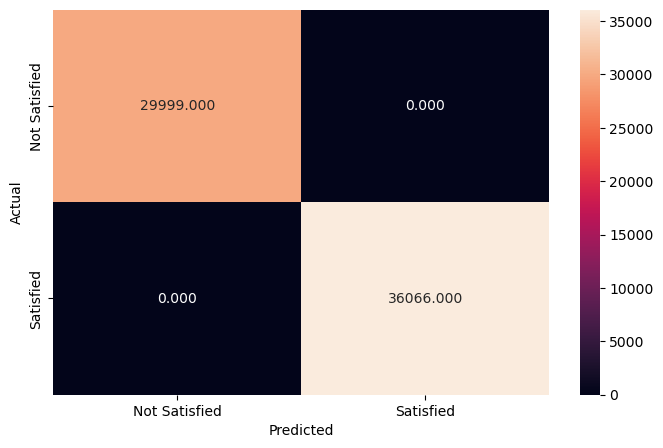

In [71]:
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

           0      0.918     0.919     0.919     12787
           1      0.934     0.932     0.933     15527

    accuracy                          0.926     28314
   macro avg      0.926     0.926     0.926     28314
weighted avg      0.926     0.926     0.926     28314



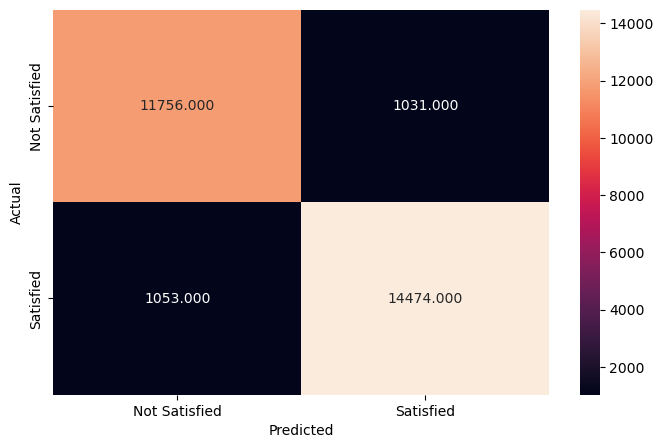

In [72]:
# here we are checkign for the overfitting
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

In [73]:
def show_importance(d_tree, thresh_hold=0, data=X_train):
    importance = pd.DataFrame(d_tree.feature_importances_, columns = ["Imp"], index = data.columns).sort_values(by = 'Imp', ascending = False)
    print (importance)
    print('0 importance features:')
    return importance[importance['Imp']<=thresh_hold], importance[importance['Imp']>thresh_hold]
to_drop, to_keep = show_importance(d_tree, 0.001)
to_drop.index.astype(str).values

                                          Imp
Onboard_Entertainment_Excellent      0.198396
Onboard_Entertainment_Good           0.191581
Seat_Comfort_Excellent               0.069463
Seat_Comfort_Extremely Poor          0.057607
Seat_Comfort_Good                    0.040721
...                                       ...
Onboard_Entertainment_Missing        0.000000
Onboard_Wifi_Service_Extremely Poor  0.000000
Online_Boarding_Extremely Poor       0.000000
Onboard_Service_Extremely Poor       0.000000
Online_Boarding_Missing              0.000000

[91 rows x 1 columns]
0 importance features:


array(['Catering_Poor', 'Onboard_Entertainment_Needs Improvement',
       'Legroom_Extremely Poor', 'Ease_of_Online_Booking_Extremely Poor',
       'Gender_Missing', 'Legroom_Missing',
       'Onboard_Wifi_Service_Missing',
       'Platform_Location_Very Inconvenient', 'Baggage_Handling_Missing',
       'Seat_Comfort_Missing', 'CheckIn_Service_Missing',
       'Onboard_Entertainment_Extremely Poor',
       'Online_Support_Extremely Poor', 'Online_Support_Missing',
       'Ease_of_Online_Booking_Missing', 'Cleanliness_Extremely Poor',
       'Onboard_Entertainment_Missing',
       'Onboard_Wifi_Service_Extremely Poor',
       'Online_Boarding_Extremely Poor', 'Onboard_Service_Extremely Poor',
       'Online_Boarding_Missing'], dtype=object)

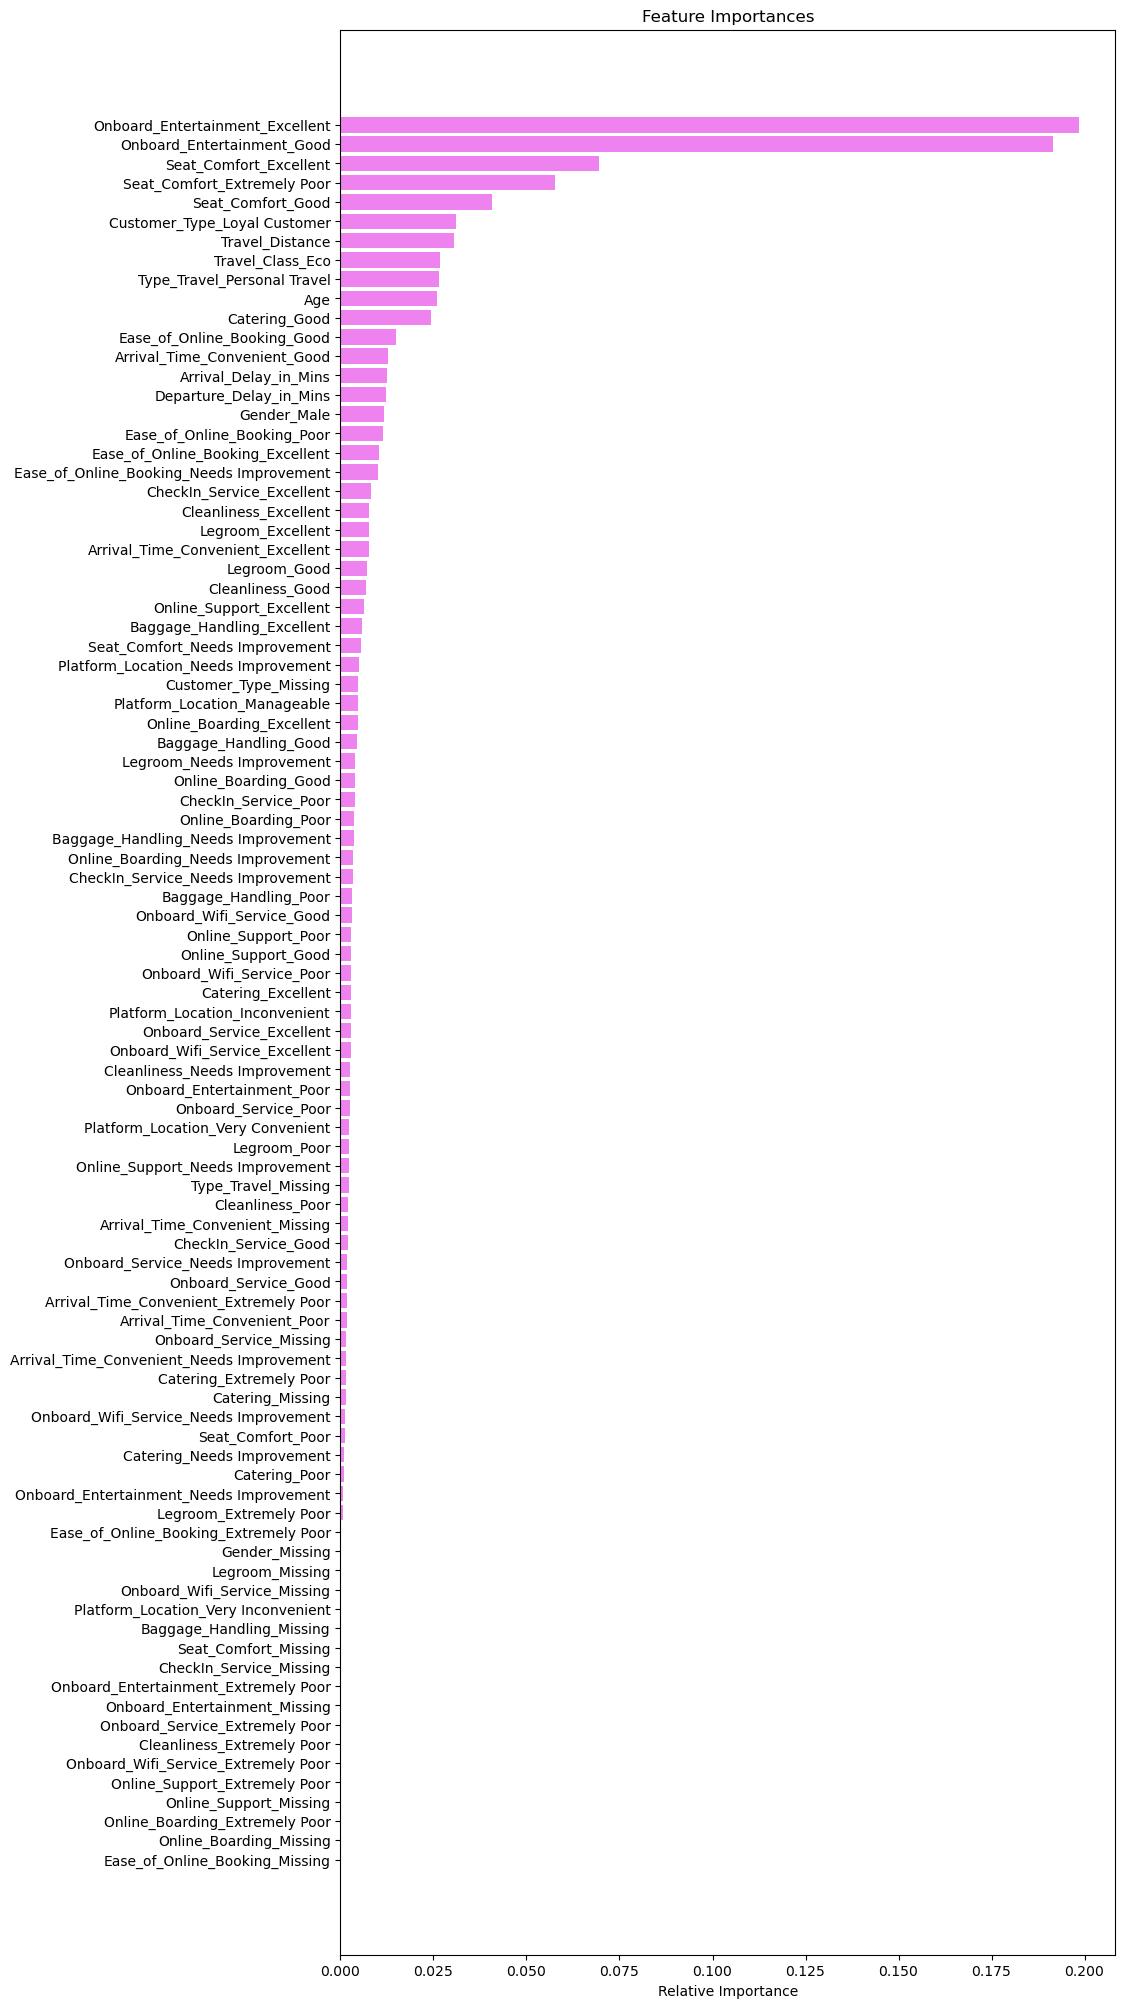

In [74]:
# Plotting the feature importance
def plot_importance(d_tree, data=X_train):
    features = list(data.columns)
    importances = d_tree.feature_importances_

    indices = np.argsort(importances)

    plt.figure(figsize = (10, 25))

    plt.title('Feature Importances')

    plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

    plt.yticks(range(len(indices)), [features[i] for i in indices])

    plt.xlabel('Relative Importance')

    plt.show()
    
plot_importance(d_tree)

### Parameter Tuning 

In [75]:
import multiprocessing
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.545917, 1: 0.454083})
# Grid of parameters to choose from
parameters = {'max_depth': np.arange(10, 20, 30), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [20, 40, 60, 100, 150]
             }
# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)
n_cpus = multiprocessing.cpu_count()
# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5, n_jobs=n_cpus)
grid_obj = grid_obj.fit(X_train, y_train)
# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_
# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)
#IMPORTANT NOTE we use the values on the Huyper parameter {0: 0.545917, 1: 0.454083} since will 
# be the opposite of the imbalance in the original Data 

DecisionTreeClassifier(class_weight={0: 0.545917, 1: 0.454083}, max_depth=10,
                       min_samples_leaf=150, random_state=1)

In [76]:
d_tree_tuned =  DecisionTreeClassifier(class_weight={0: 0.545917, 1: 0.454083}, max_depth=10, min_samples_leaf=150, random_state=1)

d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.545917, 1: 0.454083}, max_depth=10,
                       min_samples_leaf=150, random_state=1)

              precision    recall  f1-score   support

           0      0.894     0.909     0.901     29999
           1      0.923     0.910     0.917     36066

    accuracy                          0.910     66065
   macro avg      0.909     0.910     0.909     66065
weighted avg      0.910     0.910     0.910     66065



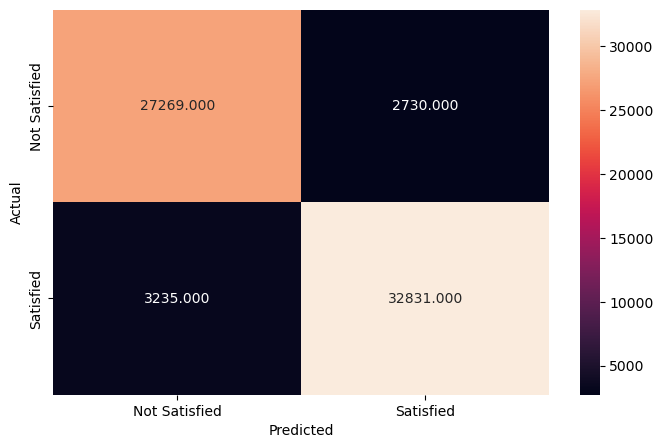

In [77]:
# trying out the results on the data we have just trained hope it works
y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0      0.893     0.909     0.901     12787
           1      0.924     0.910     0.917     15527

    accuracy                          0.910     28314
   macro avg      0.908     0.910     0.909     28314
weighted avg      0.910     0.910     0.910     28314



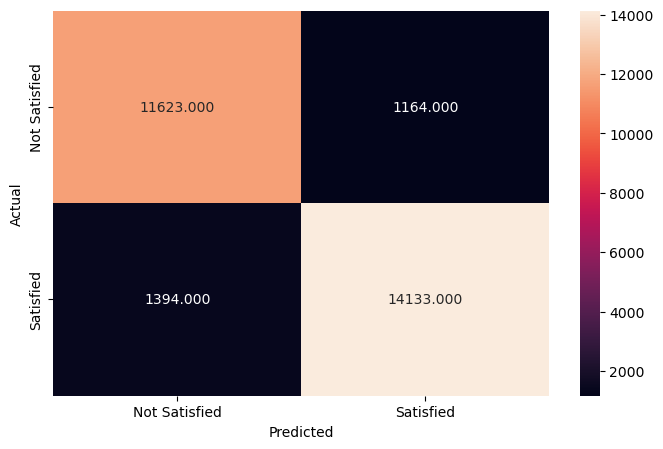

In [78]:
# hoping this works too
y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_score(y_test, y_pred_test2)

*Observation*
* Quite dissapointed since I expected it could improve the model but in reality it did the opposite

In [79]:
to_drop, to_keep = show_importance(d_tree_tuned, 0.001)
to_drop.index.astype(str).values

                                               Imp
Onboard_Entertainment_Excellent           0.286483
Onboard_Entertainment_Good                0.248925
Seat_Comfort_Excellent                    0.087596
Seat_Comfort_Extremely Poor               0.075116
Seat_Comfort_Good                         0.051790
...                                            ...
Seat_Comfort_Needs Improvement            0.000000
Ease_of_Online_Booking_Missing            0.000000
Ease_of_Online_Booking_Needs Improvement  0.000000
Catering_Extremely Poor                   0.000000
Online_Boarding_Poor                      0.000000

[91 rows x 1 columns]
0 importance features:


array(['Cleanliness_Needs Improvement', 'Catering_Excellent',
       'Arrival_Time_Convenient_Excellent', 'Cleanliness_Good',
       'Arrival_Time_Convenient_Missing', 'Online_Support_Good',
       'Onboard_Service_Good', 'Type_Travel_Missing',
       'Baggage_Handling_Needs Improvement', 'Onboard_Wifi_Service_Poor',
       'Onboard_Service_Missing', 'Platform_Location_Needs Improvement',
       'Onboard_Wifi_Service_Excellent', 'Baggage_Handling_Excellent',
       'Online_Boarding_Excellent', 'Onboard_Service_Poor',
       'Cleanliness_Extremely Poor', 'Legroom_Extremely Poor',
       'Customer_Type_Missing', 'Legroom_Missing',
       'Legroom_Needs Improvement', 'Legroom_Poor',
       'CheckIn_Service_Poor', 'CheckIn_Service_Needs Improvement',
       'Baggage_Handling_Missing', 'Online_Boarding_Extremely Poor',
       'Baggage_Handling_Poor', 'Online_Boarding_Missing',
       'Gender_Missing', 'CheckIn_Service_Good',
       'CheckIn_Service_Missing', 'Onboard_Service_Needs Improveme

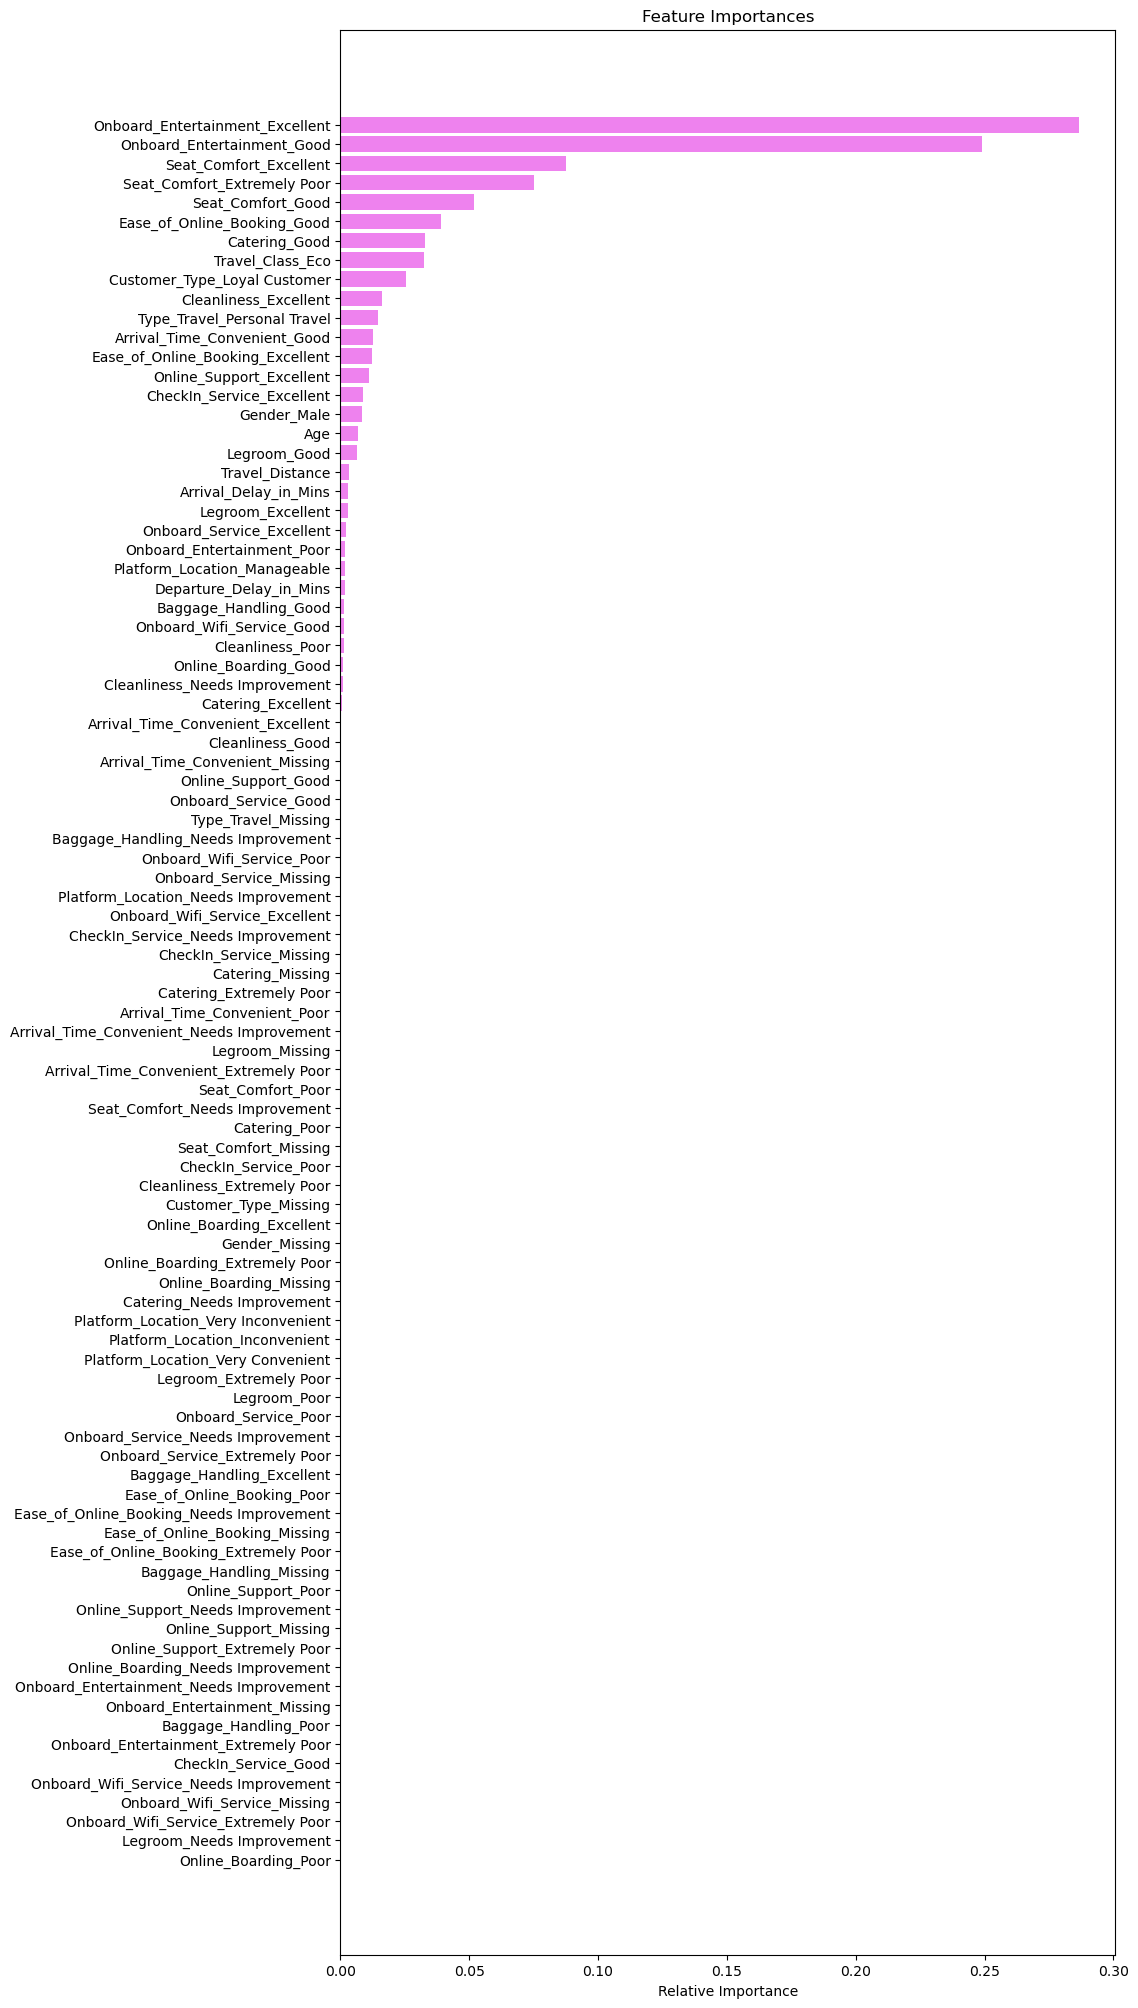

In [80]:
plot_importance(d_tree_tuned)

## Classifier Random Forest

In [81]:
rf_estimator = RandomForestClassifier(class_weight={0: 0.545917, 1: 0.454083}, random_state=1, criterion='entropy')
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.545917, 1: 0.454083},
                       criterion='entropy', random_state=1)

*Cheking again the performance on the model hoping on improving it*

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     29999
           1      1.000     1.000     1.000     36066

    accuracy                          1.000     66065
   macro avg      1.000     1.000     1.000     66065
weighted avg      1.000     1.000     1.000     66065



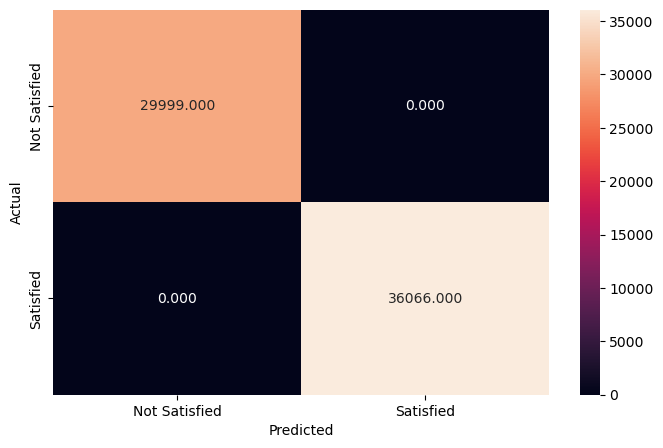

In [82]:
y_pred_train3 = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

           0      0.933     0.952     0.942     12787
           1      0.960     0.943     0.952     15527

    accuracy                          0.947     28314
   macro avg      0.946     0.948     0.947     28314
weighted avg      0.948     0.947     0.947     28314



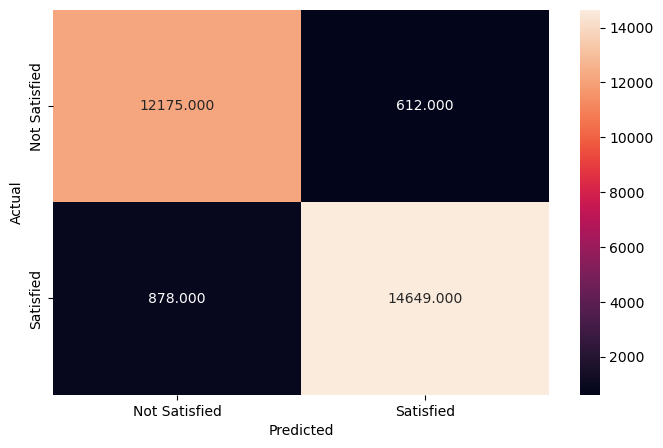

In [83]:
y_pred_test3 = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test3)

In [84]:
to_drop, to_keep = show_importance(rf_estimator, 0.01)
to_drop = to_drop.index.astype(str).values
X_train1 = X_train.drop(to_drop, axis=1)

                                          Imp
Onboard_Entertainment_Excellent      0.087166
Seat_Comfort_Excellent               0.069731
Onboard_Entertainment_Good           0.039751
Travel_Distance                      0.037267
Travel_Class_Eco                     0.036124
...                                       ...
Online_Boarding_Missing              0.000014
Platform_Location_Very Inconvenient  0.000014
Cleanliness_Extremely Poor           0.000002
Onboard_Service_Extremely Poor       0.000001
Online_Support_Extremely Poor        0.000001

[91 rows x 1 columns]
0 importance features:


*Another Training with the random Forest*

In [85]:
rf_estimator1 = RandomForestClassifier(random_state=1, criterion='entropy')
rf_estimator1.fit(X_train1, y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     29999
           1      1.000     1.000     1.000     36066

    accuracy                          1.000     66065
   macro avg      1.000     1.000     1.000     66065
weighted avg      1.000     1.000     1.000     66065



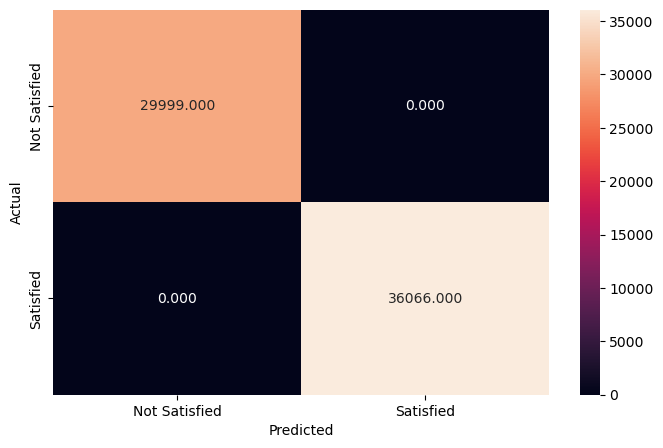

In [86]:
y_pred_train3 = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

           0      0.933     0.952     0.942     12787
           1      0.960     0.943     0.952     15527

    accuracy                          0.947     28314
   macro avg      0.946     0.948     0.947     28314
weighted avg      0.948     0.947     0.947     28314



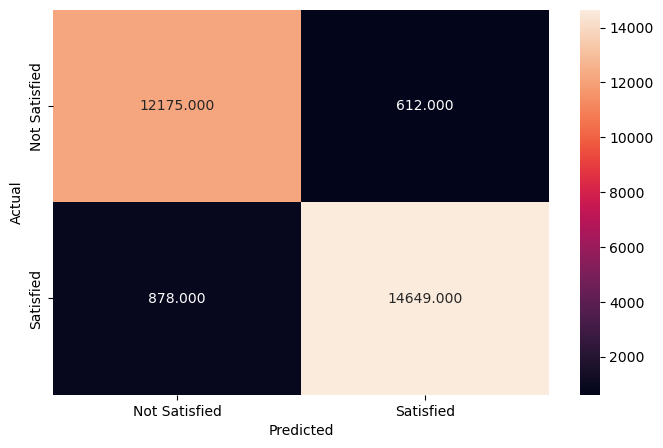

In [87]:
y_pred_test3 = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test3)

*Observation*
* We notice some improvement but we'll try to tune some hyperparameters

In [88]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 1, class_weight={0: 0.545917, 1: 0.454083})

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 200, 300],
              "max_depth": [9, 10, 11],
              "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

n_cpus = multiprocessing.cpu_count()
# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5, verbose=2, n_jobs=n_cpus)

grid_obj = grid_obj.fit(X_train1, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [89]:
rf_estimator_tuned.fit(X_train1, y_train)

RandomForestClassifier(class_weight={0: 0.545917, 1: 0.454083},
                       criterion='entropy', max_depth=11, max_features=0.8,
                       n_estimators=300, random_state=1)

              precision    recall  f1-score   support

           0      0.905     0.961     0.932     29999
           1      0.966     0.916     0.940     36066

    accuracy                          0.936     66065
   macro avg      0.935     0.938     0.936     66065
weighted avg      0.938     0.936     0.936     66065



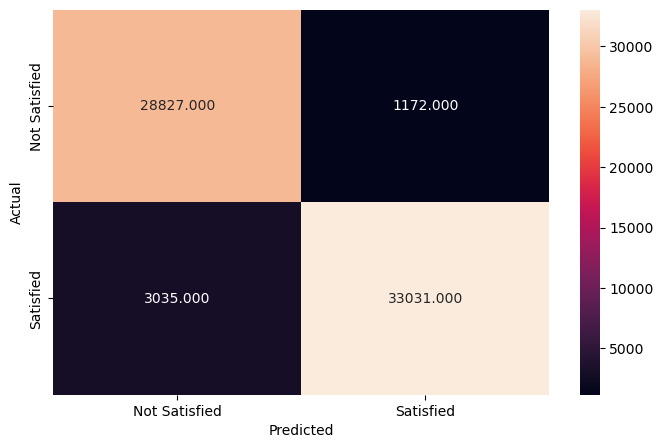

In [90]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train1)

metrics_score(y_train, y_pred_train4)

              precision    recall  f1-score   support

           0      0.933     0.952     0.942     12787
           1      0.960     0.943     0.952     15527

    accuracy                          0.947     28314
   macro avg      0.946     0.948     0.947     28314
weighted avg      0.948     0.947     0.947     28314



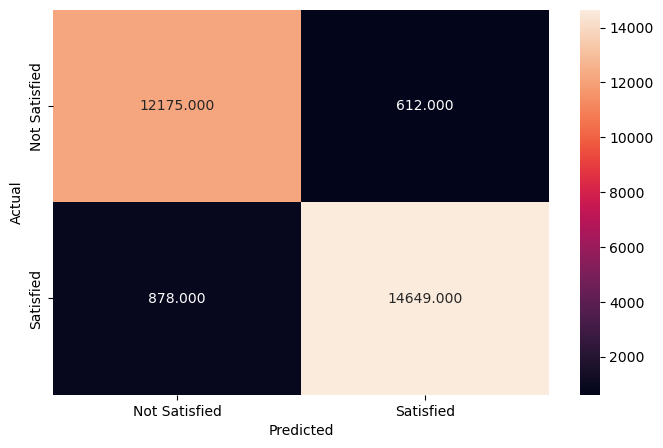

In [91]:
y_pred_test4 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test4)

*Trying out some moodels*

*Adaptive Boosting Model*

In [92]:
#Adaptive boosting Model
from sklearn.ensemble import AdaBoostClassifier
base = RandomForestClassifier(random_state=1, criterion='entropy')
adaboost = AdaBoostClassifier(base_estimator=base, n_estimators=300, random_state=1)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                         random_state=1),
                   n_estimators=300, random_state=1)

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     29999
           1      1.000     1.000     1.000     36066

    accuracy                          1.000     66065
   macro avg      1.000     1.000     1.000     66065
weighted avg      1.000     1.000     1.000     66065



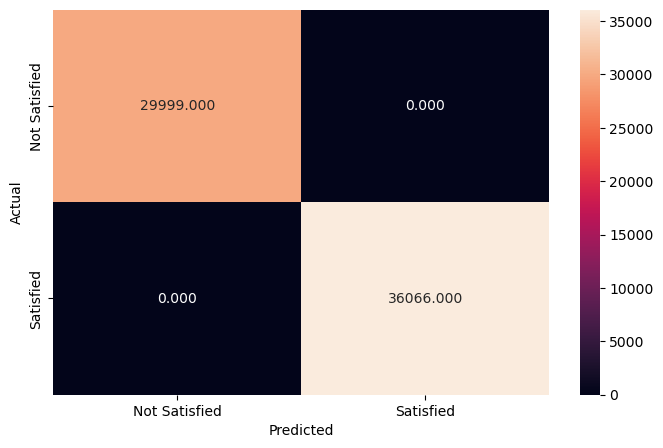

In [93]:
y_pred_train5 = adaboost.predict(X_train)
metrics_score(y_train, y_pred_train5)

              precision    recall  f1-score   support

           0      0.932     0.952     0.942     12787
           1      0.960     0.943     0.951     15527

    accuracy                          0.947     28314
   macro avg      0.946     0.947     0.947     28314
weighted avg      0.947     0.947     0.947     28314



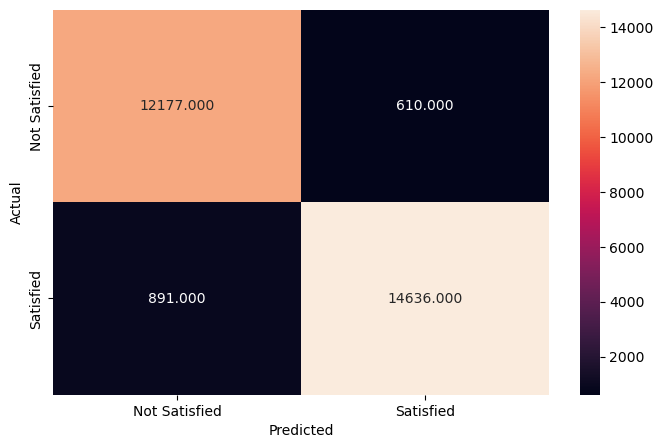

In [94]:
y_pred_train5 = adaboost.predict(X_test)
metrics_score(y_test, y_pred_train5)

*Adaptive Boost with HyperSpace Tuning*

In [95]:
param_grid = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.01, 0.1, 1, 1.1],
    'algorithm': ['SAMME', 'SAMME.R']
}

ada = AdaBoostClassifier()

n_cpus = multiprocessing.cpu_count()
grid_search = GridSearchCV(ada, param_grid, cv=5, n_jobs=n_cpus)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 300}
Best score:  0.9004768031484145


In [96]:
best_ada = AdaBoostClassifier(n_estimators=grid_search.best_params_['n_estimators'], 
                              learning_rate=grid_search.best_params_['learning_rate'], 
                              algorithm=grid_search.best_params_['algorithm'])
best_ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=300)

              precision    recall  f1-score   support

           0      0.886     0.895     0.891     12787
           1      0.913     0.905     0.909     15527

    accuracy                          0.901     28314
   macro avg      0.900     0.900     0.900     28314
weighted avg      0.901     0.901     0.901     28314



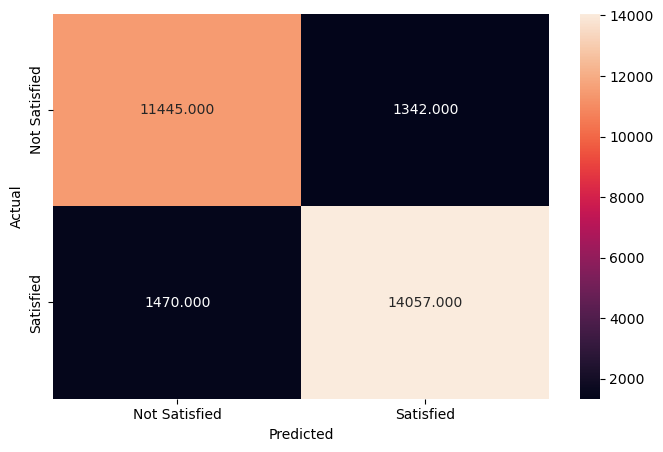

In [97]:
y_pred_train5 = best_ada.predict(X_test)
metrics_score(y_test, y_pred_train5)

*Now Doing HyperSpace search for XGBoost*

In [98]:
X_train10, X_test10, y_train10, y_test10 = train_test_split(X_train, y_train, test_size = 0.15, random_state = 1)

In [99]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import log_loss
import xgboost as xgb
# Defining the objective function for hyperopt
def objective(params):
    # Load the training data
    dtrain = xgb.DMatrix(X_train10, label=y_train10)
    # Set the XGBoost parameters
    xgb_params = {
        'learning_rate': params['learning_rate'],
        'max_depth': int(params['max_depth']),
        'subsample': params['subsample'],
        'gamma': params['gamma'],
        'colsample_bytree': params['colsample_bytree'],
        'objective': 'binary:logistic',
        'nthread': -1,
        'seed': 7
    }
    # Train the XGBoost model
    model = xgb.train(xgb_params, dtrain)
    # Make predictions on the test set
    dtest = xgb.DMatrix(X_test10)
    y_pred = model.predict(dtest)
    # Compute the log loss
    loss = log_loss(y_test10, y_pred)
    return {'loss': loss, 'status': STATUS_OK}
# Define the hyperparameters to search over
space = {
    'n_estimators': 300,
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.4),
    'max_depth': hp.quniform('max_depth', 2, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'gamma': hp.uniform('gamma', 0, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)
}
# Set up the hyperparameter search
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)
best

100%|██████████| 100/100 [00:36<00:00,  2.77trial/s, best loss: 0.14960154260045405]


{'colsample_bytree': 0.6721832892322176,
 'gamma': 0.007877350356077562,
 'learning_rate': 0.3901634250195486,
 'max_depth': 10.0,
 'subsample': 0.7974559795955541}

In [100]:
xgb_params = {
        'n_estimators': 300,
        'learning_rate': best['learning_rate'],
        'max_depth': int(best['max_depth']),
        'subsample': best['subsample'],
        'gamma': best['gamma'],
        'colsample_bytree': best['colsample_bytree'],
        'objective': 'binary:logistic',
        'nthread': -1,
        'seed': 7
}

xgb_model = xgb.XGBRegressor(**xgb_params)
xgb_model.fit(X_train10, y_train10)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6721832892322176, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.007877350356077562, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3901634250195486, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, nthread=-1, num_parallel_tree=None,
             objective='binary:logistic', ...)

              precision    recall  f1-score   support

           0      0.942     0.950     0.946      4496
           1      0.958     0.951     0.955      5414

    accuracy                          0.951      9910
   macro avg      0.950     0.951     0.950      9910
weighted avg      0.951     0.951     0.951      9910



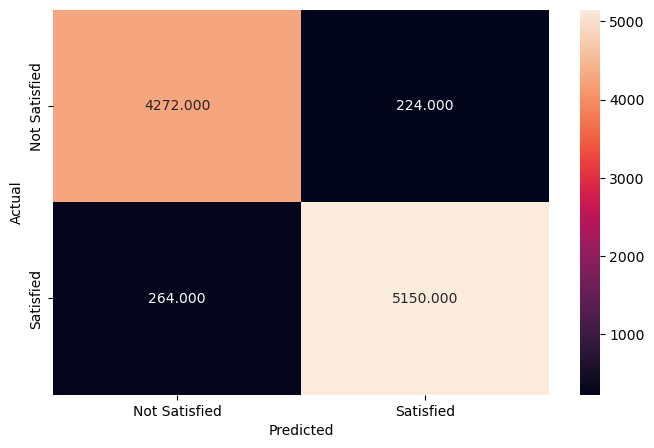

In [101]:
y_pred_train7 = xgb_model.predict(X_test10)
y_pred_binary = [1 if y >= 0.5 else 0 for y in y_pred_train7]
metrics_score(y_test10, y_pred_binary)

*CatBoost*

In [102]:
%%capture
pd.set_option('display.max_rows', 20)

In [103]:
from sklearn import datasets
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
# load data

#Instantiate CatBoostClassifier
cbc = CatBoostClassifier(verbose=0)

#create the grid
grid = {'max_depth': [5, 9, 10, 12],'n_estimators':[100, 300, 500, 700]}

#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='accuracy', cv = 5)

#fit the model
gscv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000176544974F0>,
             param_grid={'max_depth': [5, 9, 10, 12],
                         'n_estimators': [100, 300, 500, 700]},
             scoring='accuracy')

In [104]:
#Returning the estimator with the best performance
print(gscv.best_estimator_)
#Returning the best score
print(gscv.best_score_)
#Returning the best parameters
print(gscv.best_params_)

0.9547718156361158
{'max_depth': 9, 'n_estimators': 700}


              precision    recall  f1-score   support

           0      0.944     0.961     0.953     12787
           1      0.967     0.953     0.960     15527

    accuracy                          0.957     28314
   macro avg      0.956     0.957     0.956     28314
weighted avg      0.957     0.957     0.957     28314



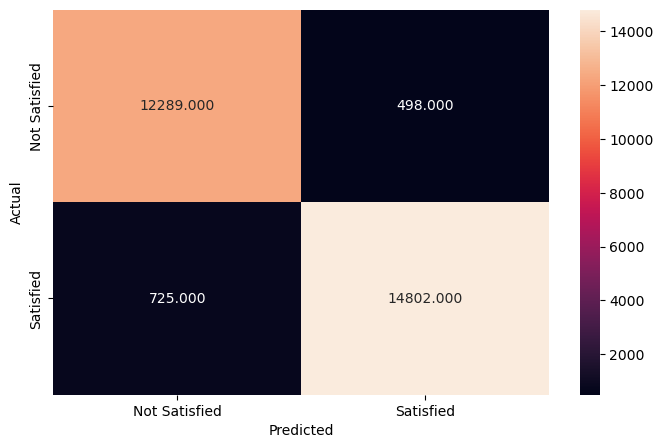

In [105]:
y_pred_test12 = gscv.predict(X_test)
metrics_score(y_test, y_pred_test12)

In [106]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the CatBoost classifier with a learning rate of 0.1
clf = CatBoostClassifier(max_depth=11, learning_rate=0.0752)

# Fit the classifier to the training data
clf.fit(X_train, y_train, verbose=False)

              precision    recall  f1-score   support

           0      0.943     0.959     0.951     12787
           1      0.966     0.952     0.959     15527

    accuracy                          0.955     28314
   macro avg      0.954     0.955     0.955     28314
weighted avg      0.955     0.955     0.955     28314



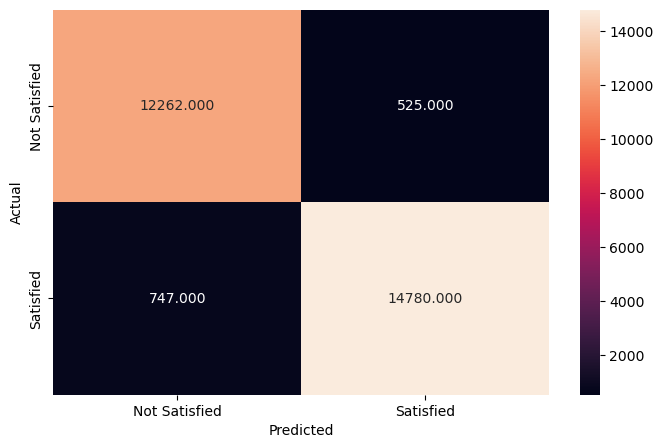

In [107]:
y_pred_test7 = clf.predict(X_test)

metrics_score(y_test, y_pred_test7)

*Observation*
* The highest performing model is achieved with a maximum depth of 9, resulting in an accuracy of 0.955.
* We'll explore if we can further improve the model's fit by incorporating higher order terms of the features.


*CatBoost* Randomized Search*

In [108]:
to_drop, to_keep = show_importance(clf, 0, data=X)
to_drop = to_drop.index.to_numpy()
X_small = X.drop(to_drop, axis=1)

                                              Imp
Type_Travel_Personal Travel          6.013163e+00
Seat_Comfort_Good                    5.613626e+00
Seat_Comfort_Excellent               5.592323e+00
Gender_Male                          5.144815e+00
Onboard_Entertainment_Excellent      4.774701e+00
...                                           ...
Onboard_Entertainment_Missing        4.807556e-07
Onboard_Service_Extremely Poor       0.000000e+00
Cleanliness_Extremely Poor           0.000000e+00
Onboard_Wifi_Service_Extremely Poor  0.000000e+00
Online_Support_Extremely Poor        0.000000e+00

[91 rows x 1 columns]
0 importance features:


In [109]:
from scipy.stats import randint as sp_randint
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'learning_rate': [0.07, 0.08, 0.09, 0.1],
    'l2_leaf_reg': [1, 2, 3],
    'max_depth': sp_randint(9, 13),
    'n_estimators': sp_randint(100, 400)
}
# Create the CatBoostClassifier
cat = CatBoostClassifier()
n_cpus = multiprocessing.cpu_count()
# Perform random search cross-validation to find the best hyperparameters
random_search = RandomizedSearchCV(cat, param_distributions=param_dist, n_iter=50, cv=5, random_state=42, n_jobs=n_cpus)
random_search.fit(X_train, y_train)
#Returning the estimator with the best performance
print(random_search.best_estimator_)
#Returning the best score
print(random_search.best_score_)
#Returning the best parameters
print(random_search.best_params_)

0:	learn: 0.5921917	total: 21.6ms	remaining: 7.7s
1:	learn: 0.5138669	total: 43.6ms	remaining: 7.75s
2:	learn: 0.4553138	total: 64.6ms	remaining: 7.62s
3:	learn: 0.4058230	total: 87.6ms	remaining: 7.73s
4:	learn: 0.3739738	total: 109ms	remaining: 7.7s
5:	learn: 0.3487531	total: 133ms	remaining: 7.79s
6:	learn: 0.3260324	total: 157ms	remaining: 7.84s
7:	learn: 0.3088269	total: 180ms	remaining: 7.84s
8:	learn: 0.2950335	total: 202ms	remaining: 7.82s
9:	learn: 0.2778919	total: 224ms	remaining: 7.78s
10:	learn: 0.2689715	total: 247ms	remaining: 7.78s
11:	learn: 0.2542400	total: 270ms	remaining: 7.75s
12:	learn: 0.2452002	total: 291ms	remaining: 7.7s
13:	learn: 0.2369263	total: 313ms	remaining: 7.67s
14:	learn: 0.2306053	total: 335ms	remaining: 7.63s
15:	learn: 0.2252744	total: 357ms	remaining: 7.61s
16:	learn: 0.2198312	total: 379ms	remaining: 7.58s
17:	learn: 0.2145502	total: 401ms	remaining: 7.55s
18:	learn: 0.2098523	total: 427ms	remaining: 7.6s
19:	learn: 0.2060075	total: 452ms	remaini

169:	learn: 0.0900497	total: 4.14s	remaining: 4.55s
170:	learn: 0.0898438	total: 4.16s	remaining: 4.53s
171:	learn: 0.0896451	total: 4.18s	remaining: 4.5s
172:	learn: 0.0895636	total: 4.21s	remaining: 4.47s
173:	learn: 0.0892408	total: 4.23s	remaining: 4.45s
174:	learn: 0.0889668	total: 4.25s	remaining: 4.42s
175:	learn: 0.0889416	total: 4.27s	remaining: 4.39s
176:	learn: 0.0886433	total: 4.29s	remaining: 4.37s
177:	learn: 0.0883455	total: 4.32s	remaining: 4.34s
178:	learn: 0.0881679	total: 4.34s	remaining: 4.32s
179:	learn: 0.0879543	total: 4.36s	remaining: 4.29s
180:	learn: 0.0877508	total: 4.39s	remaining: 4.27s
181:	learn: 0.0874926	total: 4.42s	remaining: 4.25s
182:	learn: 0.0873884	total: 4.44s	remaining: 4.22s
183:	learn: 0.0871163	total: 4.46s	remaining: 4.2s
184:	learn: 0.0868929	total: 4.49s	remaining: 4.17s
185:	learn: 0.0866786	total: 4.51s	remaining: 4.14s
186:	learn: 0.0864339	total: 4.53s	remaining: 4.12s
187:	learn: 0.0861344	total: 4.55s	remaining: 4.09s
188:	learn: 0.

332:	learn: 0.0642552	total: 8.05s	remaining: 580ms
333:	learn: 0.0640802	total: 8.08s	remaining: 556ms
334:	learn: 0.0639688	total: 8.1s	remaining: 532ms
335:	learn: 0.0639316	total: 8.12s	remaining: 508ms
336:	learn: 0.0637940	total: 8.15s	remaining: 484ms
337:	learn: 0.0637301	total: 8.17s	remaining: 459ms
338:	learn: 0.0636917	total: 8.2s	remaining: 435ms
339:	learn: 0.0636145	total: 8.22s	remaining: 411ms
340:	learn: 0.0635200	total: 8.24s	remaining: 387ms
341:	learn: 0.0634261	total: 8.27s	remaining: 363ms
342:	learn: 0.0633286	total: 8.29s	remaining: 338ms
343:	learn: 0.0630984	total: 8.31s	remaining: 314ms
344:	learn: 0.0630380	total: 8.34s	remaining: 290ms
345:	learn: 0.0628948	total: 8.36s	remaining: 266ms
346:	learn: 0.0627542	total: 8.38s	remaining: 242ms
347:	learn: 0.0627079	total: 8.41s	remaining: 217ms
348:	learn: 0.0626049	total: 8.43s	remaining: 193ms
349:	learn: 0.0624651	total: 8.46s	remaining: 169ms
350:	learn: 0.0622587	total: 8.48s	remaining: 145ms
351:	learn: 0.

In [110]:
cat = CatBoostClassifier(learning_rate=0.08, l2_leaf_reg=3, max_depth=9, n_estimators=357)
cat.fit(X_train, y_train, verbose=False)

              precision    recall  f1-score   support

           0      0.944     0.960     0.952     12787
           1      0.967     0.953     0.960     15527

    accuracy                          0.956     28314
   macro avg      0.956     0.957     0.956     28314
weighted avg      0.957     0.956     0.957     28314



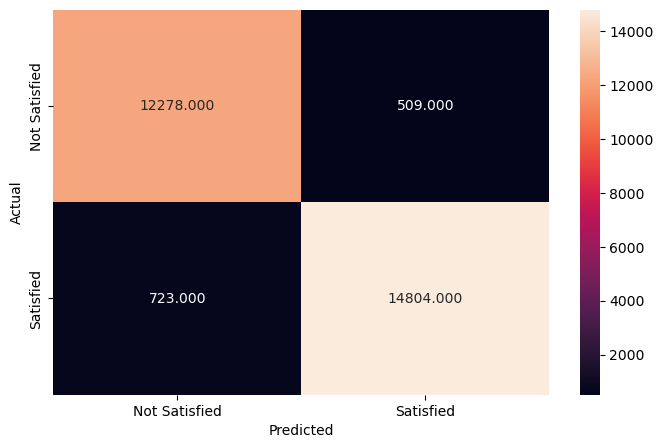

In [111]:
y_pred_test7 = cat.predict(X_test)
metrics_score(y_test, y_pred_test7)

In [114]:
sub = pd.DataFrame(X_test)
sub["Overall_Experience"] = y_pred_test7
sub_to_file = sub[["Overall_Experience"]]
sub_to_file.to_csv("Miguel_Loya_submission_1.csv", index=True)
